In [1]:
import pandas as pd
import numpy as np

In [4]:
air_quality = pd.read_csv("Air_Quality.csv")
air_quality.head(5)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64,NaN
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22,NaN
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25,NaN
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15,NaN
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89,NaN


In [6]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16122 entries, 0 to 16121
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16122 non-null  int64  
 1   Indicator ID    16122 non-null  int64  
 2   Name            16122 non-null  object 
 3   Measure         16122 non-null  object 
 4   Measure Info    16122 non-null  object 
 5   Geo Type Name   16122 non-null  object 
 6   Geo Join ID     16122 non-null  int64  
 7   Geo Place Name  16122 non-null  object 
 8   Time Period     16122 non-null  object 
 9   Start_Date      16122 non-null  object 
 10  Data Value      16122 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [9]:
air_quality.describe()

,Unique ID,Indicator ID,Geo Join ID,Data Value,Message
count,16122.000000,16122.000000,1.612200e+04,16122.000000,0.0
mean,339480.955589,427.131063,6.133394e+05,19.129163,NaN
std,194099.809551,109.657607,7.916715e+06,21.673789,NaN
min,130355.000000,365.000000,1.000000e+00,0.000000,NaN
25%,172183.250000,365.000000,2.020000e+02,8.460000,NaN
50%,221882.500000,375.000000,3.030000e+02,13.900000,NaN
75%,547749.750000,386.000000,4.040000e+02,25.470000,NaN
max,671122.000000,661.000000,1.051061e+08,424.700000,NaN


In [18]:
air_quality.shape


(16122, 12)

In [14]:
air_quality.columns


Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Message'],
      dtype='object')

In [22]:
air_quality["Geo Type Name"].value_counts()


UHF42       6216
CD          5900
UHF34       3128
Borough      730
Citywide     148
Name: Geo Type Name, dtype: int64

In [23]:
print(air_quality.isnull().sum())


Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16122
dtype: int64


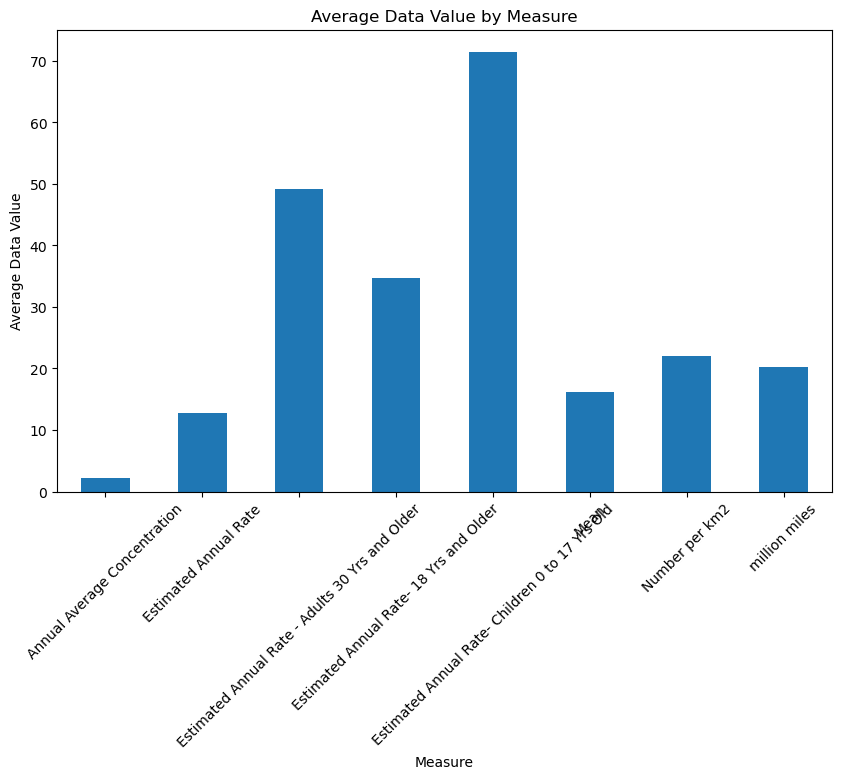

In [24]:
import matplotlib.pyplot as plt

# Group data by 'Measure' column and calculate the average data value for each measure
measure_avg = air_quality.groupby('Measure')['Data Value'].mean()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
measure_avg.plot(kind='bar')
plt.title('Average Data Value by Measure')
plt.xlabel('Measure')
plt.ylabel('Average Data Value')
plt.xticks(rotation=45)
plt.show()


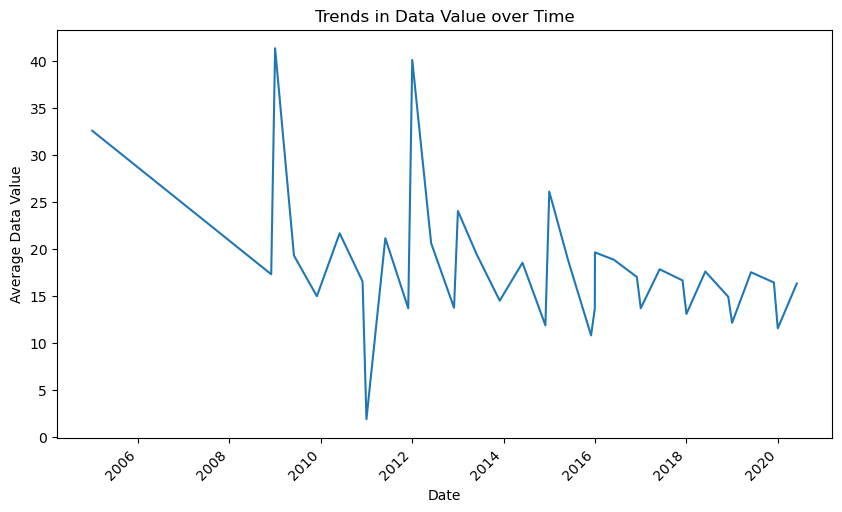

In [25]:
# Convert 'Start_Date' column to datetime format
air_quality['Start_Date'] = pd.to_datetime(air_quality['Start_Date'])

# Group data by 'Start_Date' column and calculate the average data value for each date
date_avg = air_quality.groupby('Start_Date')['Data Value'].mean()

# Plotting the line plot
plt.figure(figsize=(10, 6))
date_avg.plot()
plt.title('Trends in Data Value over Time')
plt.xlabel('Date')
plt.ylabel('Average Data Value')
plt.xticks(rotation=45)
plt.show()
